# Covariance & Correlation
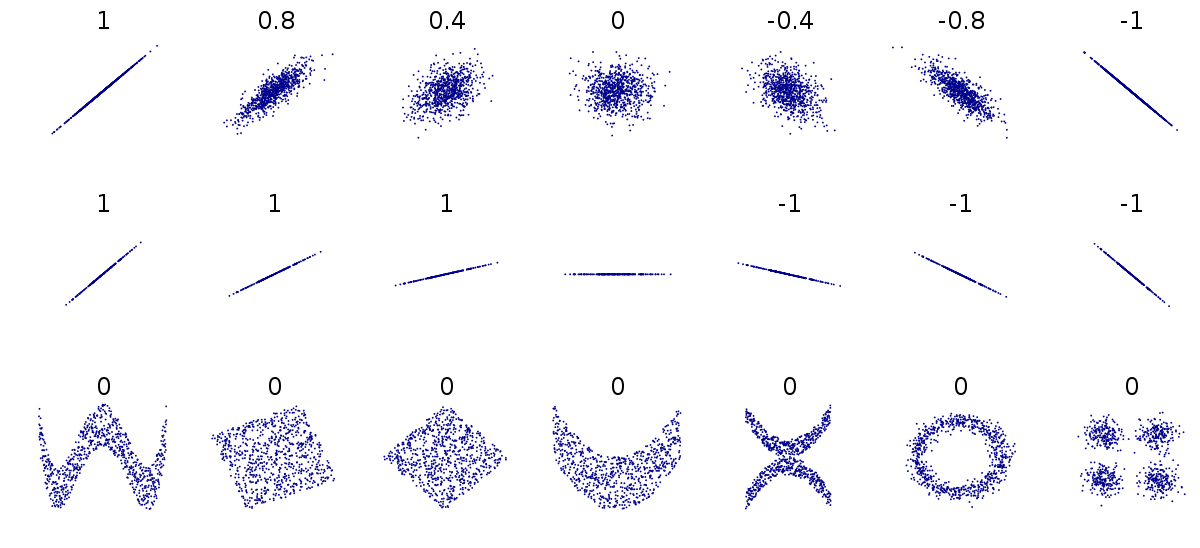

# Setup

In [ ]:
!pip install dython

In [1]:
import pandas as pd
import numpy as np
import dython.nominal as dy
from sklearn.datasets import load_wine
from sklearn.datasets import load_iris
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import KBinsDiscretizer
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

# Covariance and Correlation

## Formulas

**Random Variable**

$X$

**Expected Value**

Expected value of a random varianble is the return we expect from the random variable.

$E(X)$

**Variance**

The variance is the difference between the expected value of squaring the input and squaring the expected value.  It measures how a random variable varies with itself.

$Var(X)=E(X^2) - E(X)^2$

$Var(X)=E(XX)−E(X)E(X)$

**Covariance**

Covariance measures of how one random variable varies with another random variable.  It can be rewritten from Variance formula where we have two random variables instead of one:

$Var(X)=E(XX)−E(X)E(X)$

$Covariance(X,Y) = E(XY)-E(X)E(Y)$

**Correlation**

Covariance is unscaled.  Depending on the input you could get 5, 50, 500 for covariance and it can't be compared.  To make it comparable we normalize the covariance by the square root of the product of individual variances.

$Correlation(X,Y) = \frac{Covariance(X,Y)}{\sqrt{Var(X) Var(Y)}}$

Alteratively:

$Correlation(X,Y) = \frac{Covariance(X,Y)}{stdev(X)stdev(Y)}$

For more about why we normalize using product of the standard deviations see *Cauchy-Schwarz Inequality*:

$|E(XY )| \leq \sqrt{E(X^2)E(Y^2)}$

## Covariance Intuition
* https://stats.stackexchange.com/questions/18058/how-would-you-explain-covariance-to-someone-who-understands-only-the-mean

To understand covariance, let's decompose this and look at every pair of x, y coordinates in our dataset.  If the points are positively sloped, color the rectangle red.  If negatively sloped, color it blue. 
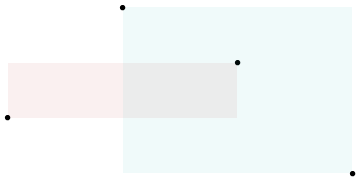

Combine all the boxes to get the next amount of red (positive).  The net amount is the covariance.  Notice, when we see a lot more blue, we have negative covariance.  Where to graph is primarly red, we have positive covariance.
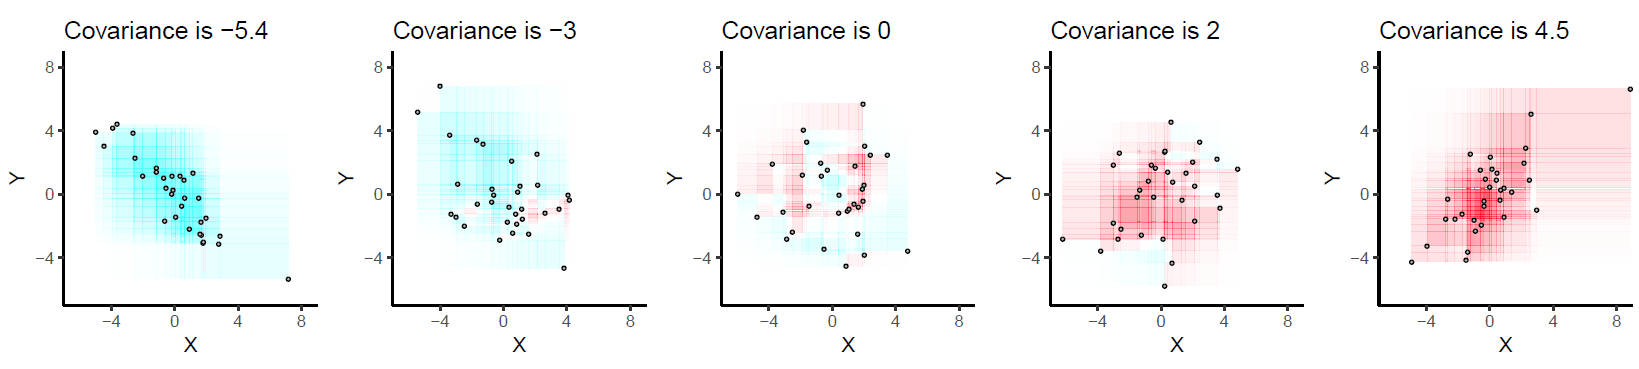

Some properties fall out of this intuition:
* Covariance is directly proportional to the scale on the x-axis and y-axis.
* Covariance increases as the points approximate an upward sloping line. 
* Covariance decreases as the points approximate a downward sloping line.
* Covariances are sensitivity to outliers. 
* This interpretation is based on Pearson's Correlation which applies to linear relationships. 

Non-linear associations can create a mix of positive and negative rectangles which makes covariance unstable.  Rank based correlation approaches can help with non-linear relationships and correlation.  Examples of approaches / techniques include:
* Spearman Correlation (*in Pandas*)
* Kendall's Tau        (*in Pandas*)
* Goodman Kruskal's Gamma
* Somers'D

# Numeric

## Load Data

In [2]:
#Simple Dataset for Numeric
wine = load_wine()
wineDF = pd.DataFrame(data = np.c_[wine['data'], wine['target']],
                      columns= wine['feature_names'] + ['target']) 

In [3]:
wineDF.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                          float64
dtype: object

In [4]:
wineDF.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


## Pearson Correlation HeatMap

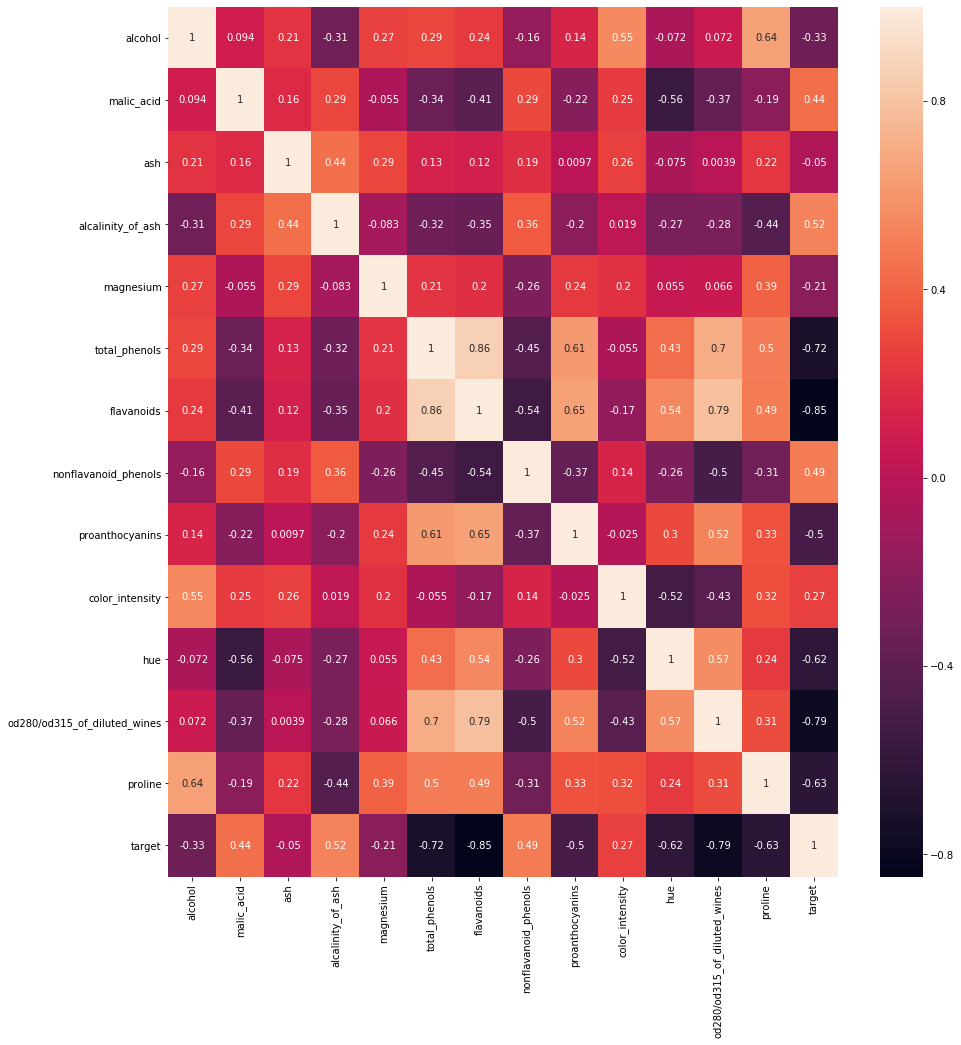

In [5]:
corr = wineDF.corr()
plt.figure(figsize=(15,16))
sns.heatmap(corr, 
        annot=True,
        xticklabels=corr.columns,
        yticklabels=corr.columns)

## Spearman Correlation Heatmap

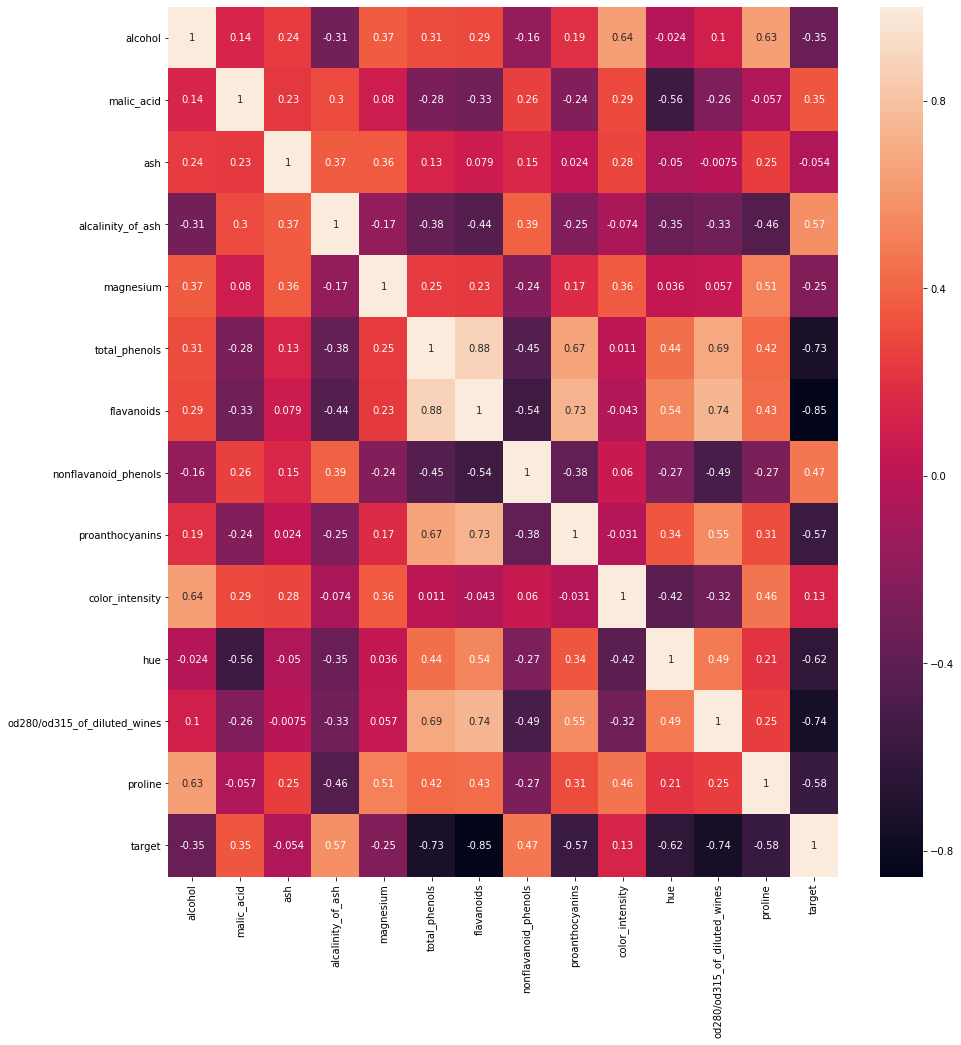

In [6]:
corr = wineDF.corr(method='spearman')
plt.figure(figsize=(15,16))
sns.heatmap(corr, 
        annot=True,
        xticklabels=corr.columns,
        yticklabels=corr.columns)

## Differences

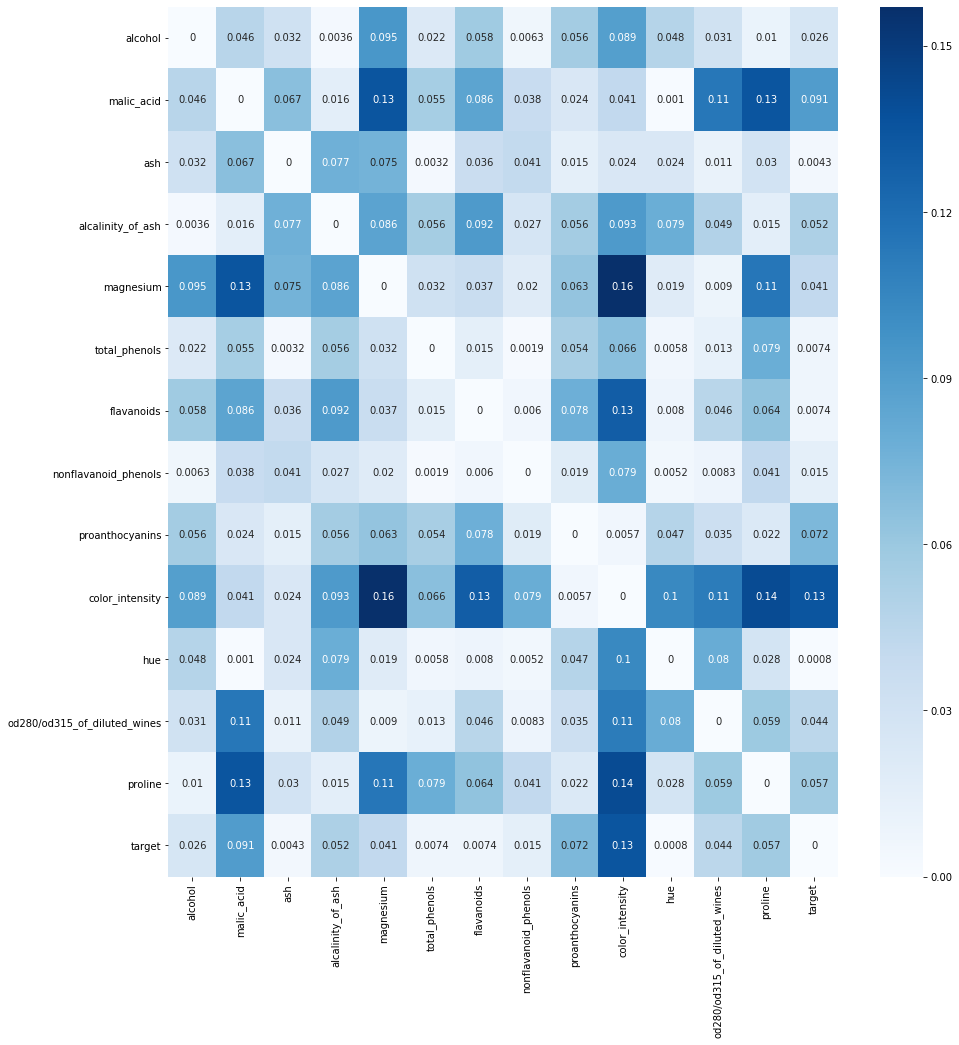

In [7]:
pearson  = wineDF.corr(method='pearson')
spearman = wineDF.corr(method='spearman')
diff = (pearson - spearman).abs()
plt.figure(figsize=(15,16))
sns.heatmap(diff, 
        annot=True,
        cmap='Blues',
        xticklabels=corr.columns,
        yticklabels=corr.columns)

# Categorical
* https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

## Load Data

In [8]:
#Cars - Categoricals
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]

# Read in the CSV file and convert "?" to NaN
carsDF = pd.read_csv("http://mlr.cs.umass.edu/ml/machine-learning-databases/autos/imports-85.data",
                  header=None, names=headers, na_values="?" )

In [9]:
carsDF.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [10]:
carsDF.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


## Convert Categorical

In [11]:
carsCatDF = carsDF.select_dtypes(include=['object']).copy()
carsCatDF.head()
for col in carsCatDF.columns:
    carsCatDF[col] = carsCatDF[col].astype('category')
carsCatDF.dtypes

make               category
fuel_type          category
aspiration         category
num_doors          category
body_style         category
drive_wheels       category
engine_location    category
engine_type        category
num_cylinders      category
fuel_system        category
dtype: object

In [12]:
carsCatDF.head()

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


## Correlation Heat Map

In [13]:
carsOneHotDF = pd.get_dummies(carsCatDF)
carsOneHotDF.dtypes

make_alfa-romero          uint8
make_audi                 uint8
make_bmw                  uint8
make_chevrolet            uint8
make_dodge                uint8
make_honda                uint8
make_isuzu                uint8
make_jaguar               uint8
make_mazda                uint8
make_mercedes-benz        uint8
make_mercury              uint8
make_mitsubishi           uint8
make_nissan               uint8
make_peugot               uint8
make_plymouth             uint8
make_porsche              uint8
make_renault              uint8
make_saab                 uint8
make_subaru               uint8
make_toyota               uint8
make_volkswagen           uint8
make_volvo                uint8
fuel_type_diesel          uint8
fuel_type_gas             uint8
aspiration_std            uint8
aspiration_turbo          uint8
num_doors_four            uint8
num_doors_two             uint8
body_style_convertible    uint8
body_style_hardtop        uint8
body_style_hatchback      uint8
body_sty

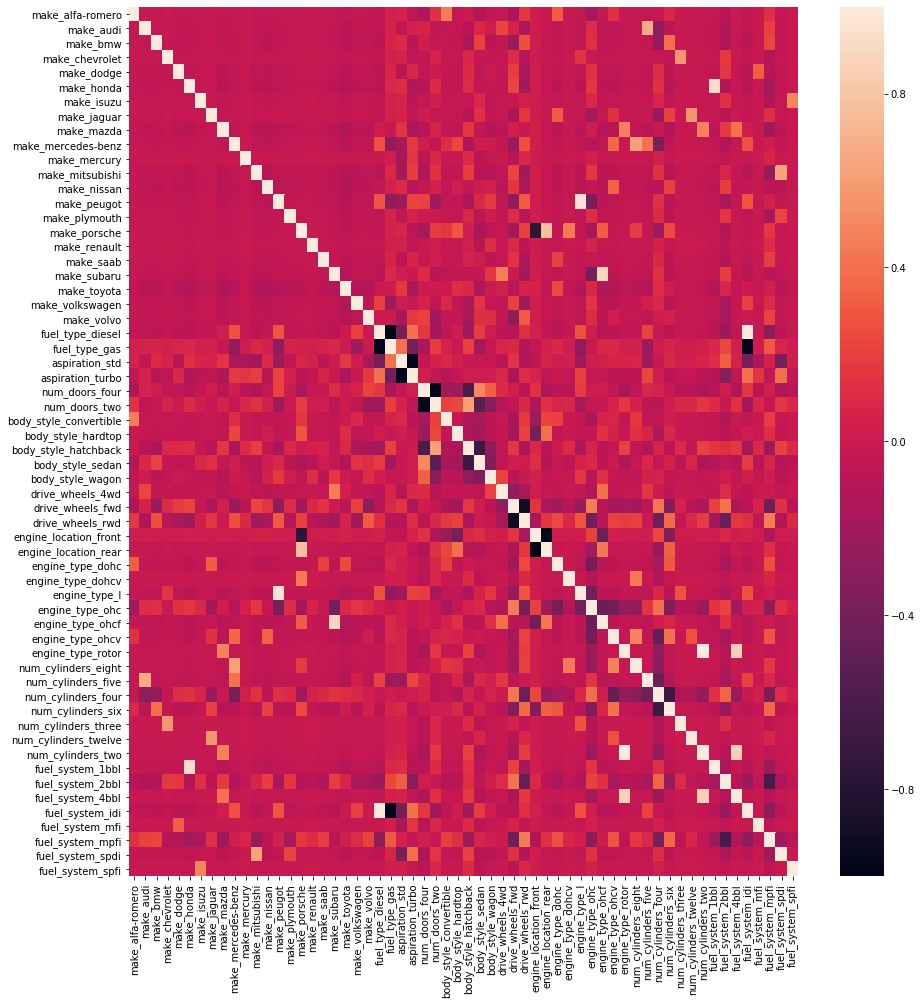

In [14]:
corr = carsOneHotDF.corr()
plt.figure(figsize=(15,16))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

## Cramers-V
* Looks like correlation but works with categorical values 
* Measures the association between two categorical features.
* Bbased on a nominal variation of Pearson’s Chi-Square Test
* Range is 0 .. 1
 * 0 means no association 
 * 1 is fully associated
 * No negative values (Associated or not)
* Cramer’s V is symmetrical — it is insensitive to swapping x and y
* Implemented with code below and in dython library

In [15]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text yticklabel objects>)

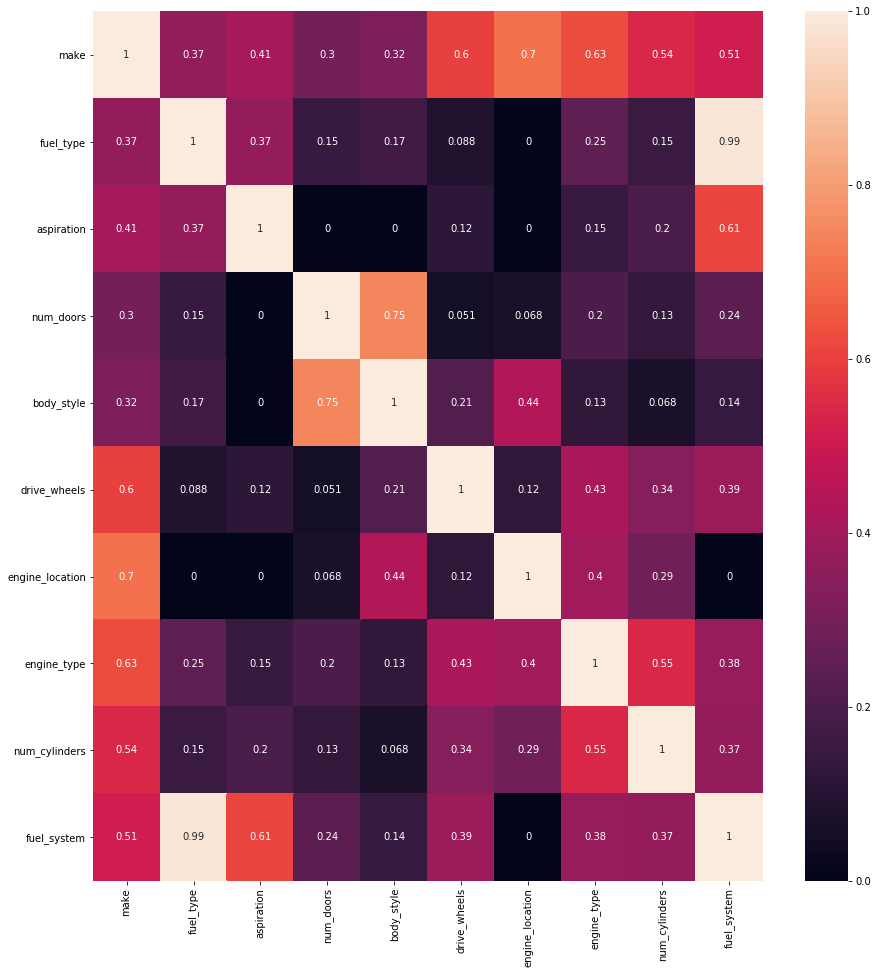

In [16]:
corr = dy.associations(carsCatDF, nominal_columns='all', plot=False, return_results=True)
plt.figure(figsize=(15,16))
sns.heatmap(corr, annot=True,
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.yticks(rotation=0) 

## Thiels-U
* Theil’s U is also called the Uncertainty Coefficient
* Based on the conditional entropy between x and y 
 * Given x, how many possible states does y have
 * How often do these states occur
* Like Cramer’s V with range of 0 .. 1
 * 0 means no association 
 * 1 is fully associated
 * No negative values (Associated or not)
* Different from Cramer's V as it's Asymmetric

In [17]:
def theils_u(x, y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text yticklabel objects>)

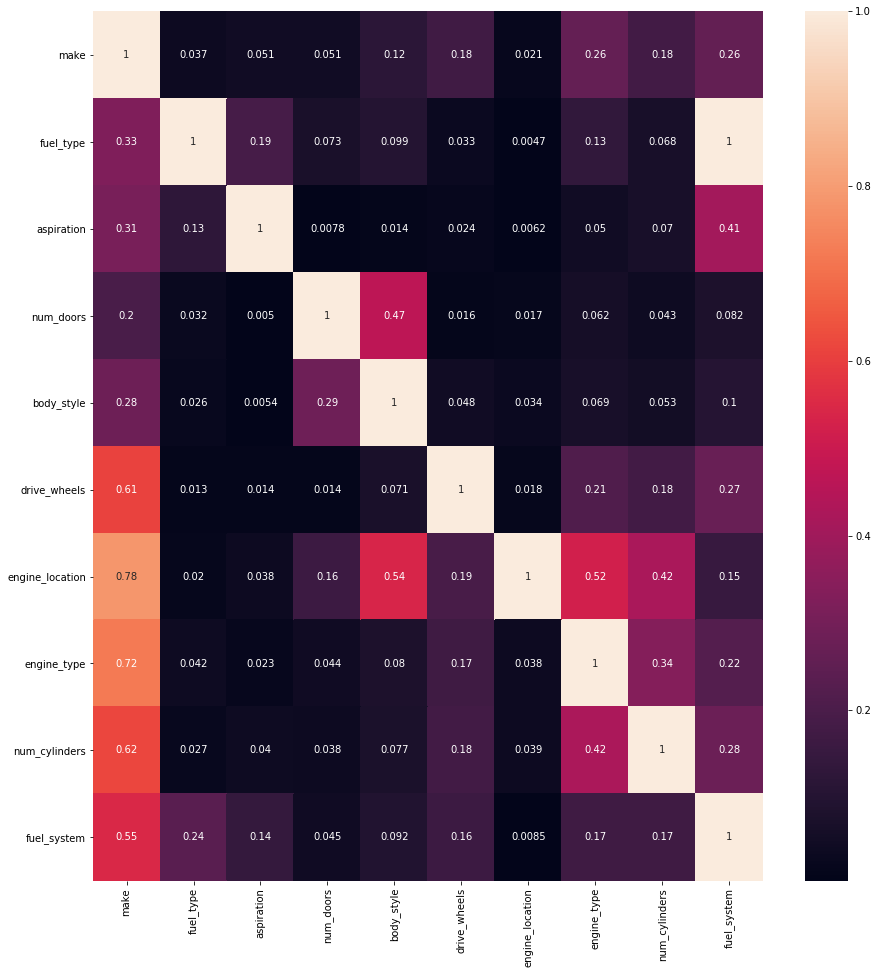

In [18]:
corr = dy.associations(carsCatDF, nominal_columns='all', theil_u=True, plot=False, return_results=True)
plt.figure(figsize=(15,16))
sns.heatmap(corr, annot=True,
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.yticks(rotation=0) 

Note:
* Engine Location --> Body Style : 0.540 (some association)
* Body Style --> Engine Location : 0.034 (almost none)
    

# Categorical - Numeric

## Load Data

In [19]:
#Diabetes - bin dates
diabetes = load_diabetes()
diabetesDF = pd.DataFrame(data = np.c_[diabetes['data'], diabetes['target']],
                          columns= diabetes['feature_names'] + ['target'])

In [20]:
diabetesDF.dtypes

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

In [21]:
diabetesDF.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [22]:
#Convert age into bins
estimator = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
diabetesDF['age_bin'] = estimator.fit_transform(diabetesDF[['age']])
diabetesDF['age_bin'] = diabetesDF['age_bin'].astype('category')
diabetesDF.drop('age', axis=1, inplace=True)
diabetesDF.dtypes

sex         float64
bmi         float64
bp          float64
s1          float64
s2          float64
s3          float64
s4          float64
s5          float64
s6          float64
target      float64
age_bin    category
dtype: object

In [23]:
diabetesDF.head()

,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,age_bin
0,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0,6.0
1,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0,4.0
2,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0,8.0
3,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0,0.0
4,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0,5.0


## Correlation Ratio
* Weighted variance of the mean of each category divided by the variance of all samples
* Given a continuous number, how easy is it to know the category 
* Range of association 0 .. 1:
 * 0 No Association
 * 1 Complete Association
 * No negatives (Association is or isn't)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 <a list of 11 Text yticklabel objects>)

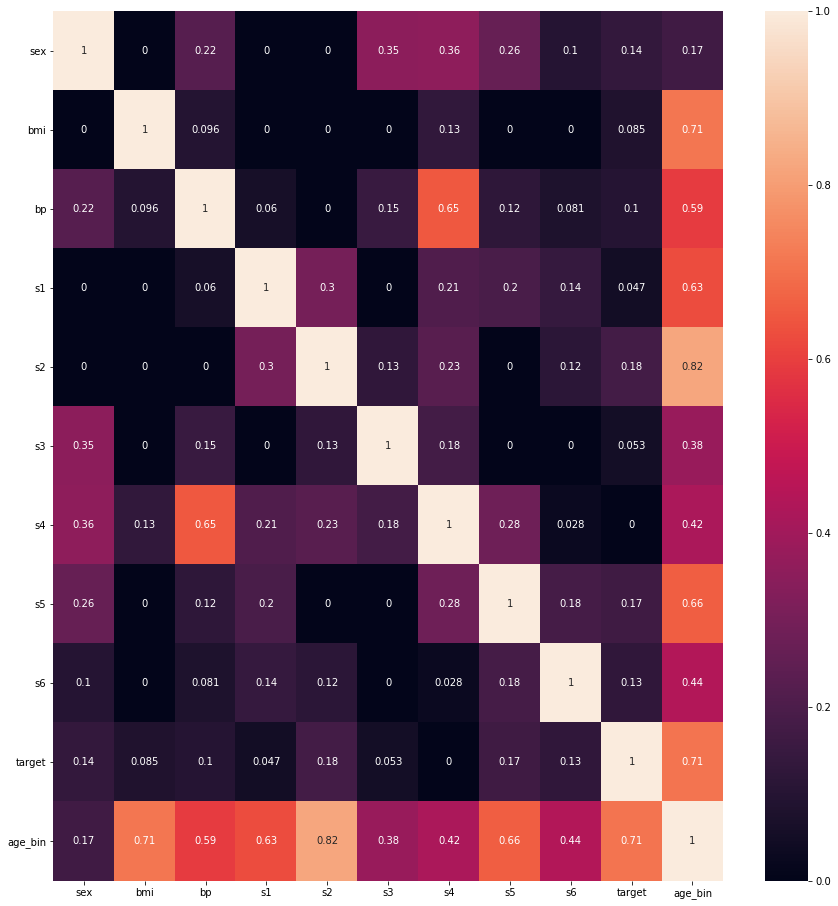

In [24]:
nom=['sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target']
corr = dy.associations(diabetesDF, nominal_columns=nom, theil_u=False, plot=False, return_results=True)
plt.figure(figsize=(15,16))
sns.heatmap(corr, annot=True,
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.yticks(rotation=0) 

In [25]:
corr

,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,age_bin
sex,1.000000,0.000000,0.222682,0.000000,0.000000,0.352798,0.356303,0.261755,0.100309,0.136635,0.169451
bmi,0.000000,1.000000,0.096157,0.000000,0.000000,0.000000,0.130418,0.000000,0.000000,0.084770,0.711882
bp,0.222682,0.096157,1.000000,0.060266,0.000000,0.148847,0.649556,0.122033,0.081217,0.100555,0.591147
s1,0.000000,0.000000,0.060266,1.000000,0.300249,0.000000,0.208881,0.195294,0.143122,0.046899,0.628022
s2,0.000000,0.000000,0.000000,0.300249,1.000000,0.128646,0.227219,0.000000,0.117168,0.177413,0.821487
s3,0.352798,0.000000,0.148847,0.000000,0.128646,1.000000,0.176429,0.000000,0.000000,0.053208,0.382708
s4,0.356303,0.130418,0.649556,0.208881,0.227219,0.176429,1.000000,0.283874,0.027610,0.000000,0.422516
s5,0.261755,0.000000,0.122033,0.195294,0.000000,0.000000,0.283874,1.000000,0.182881,0.165532,0.662767
s6,0.100309,0.000000,0.081217,0.143122,0.117168,0.000000,0.027610,0.182881,1.000000,0.127857,0.440140
target,0.136635,0.084770,0.100555,0.046899,0.177413,0.053208,0.000000,0.165532,0.127857,1.000000,0.710118


## Logistic Regression
It is possible to determine the relationship between a category (one hot encoded) and a nominal values using logistic regression.  For example, the model below is showing how values of prestige are related to admit.  Remember these coefficients are on the log odds scale.

                                     Logit Regression Results
          ==============================================================================
          Dep. Variable:                  admit   No. Observations:                  400
          Model:                          Logit   Df Residuals:                      394
          Method:                           MLE   Df Model:                            5
          Date:                Sun, 03 Mar 2013   Pseudo R-squ.:                 0.08292
          Time:                        12:34:59   Log-Likelihood:                -229.26
          converged:                       True   LL-Null:                       -249.99
                                                  LLR p-value:                 7.578e-08
          ==============================================================================
                           coef    std err          z      P>|z|      [95.0% Conf. Int.]
          ------------------------------------------------------------------------------
          gre            0.0023      0.001      2.070      0.038         0.000     0.004
          gpa            0.8040      0.332      2.423      0.015         0.154     1.454
          prestige_2    -0.6754      0.316     -2.134      0.033        -1.296    -0.055
          prestige_3    -1.3402      0.345     -3.881      0.000        -2.017    -0.663
          prestige_4    -1.5515      0.418     -3.713      0.000        -2.370    -0.733
          intercept     -3.9900      1.140     -3.500      0.000        -6.224    -1.756
          ==============================================================================


# Recommendations

|             | Categorical | Continuous |
|-------------|-------------|------------|
| **Categorical** | Cramer's V or Theil's U  | Logistic Regression or Correlation Ratio |
| **Continuous**  | Logistic Regression or Correlation Ratio | Pearson & Spearman |